# Week 3 - Imports, the standard library, and third-party libraries

When writing code, keep the DRY principle in mind.

**DRY = Don't Repeat Yourself**

Loops and functions are fantastic ways of not repeating yourself. Loops help you to avoid repeating yourself line for line, and functions help you avoid repeating yourself at several different places within a program. 

What happens if you find that you are repeating yourself in *separate programs*? In that case, you should use a module, or maybe even a collection of modules (known as a library). Modular code is generally more simple, maintainable and reusable, because it breaks down what may be a large problem into smaller separate problem domains, and it limits the number of places that code needs to be modified when fixing bugs or adding new functionality.

## Modules and the `import` statement

A Python module is basically a file with a `.py` extension that lives somewhere on your computer, and whose contents can be made available to the programmer via the `import` statement. In the first week, we encountered the `import` statement in its simplest form when using the `randrange` function from Python's built-in `random` module (to generate a random number for the guessing game).

```Python
import random

num = random.randrange(1, 101)
print("The number is", num)
```

What happens in this code? 

First, we import the module `random`. This creates a new **namespace** for the module, which is basically a private symbol table, contained within the global namespace, which allows us to access all of the functionality of the `random` module via **dot notation**. 

Second, we use dot notation to access and call the `randrange` function, which chooses a random number between the two values specified. In this case, we pass `1` and `101` for a random number between 1 and 100. 

Finally, we print out the value of `num`.

We can learn more about namespaces with help from the `dir()` builtin, which returns a list of the names in a defined namespace. Called without arguments, `dir()` returns a list of names in the current local namespace. 

In [1]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'quit']


All elements of the above list are either Python's namespace defaults or special history / input caching variables of the IPython console. There is nothing that *we* put there. 

Now, let's run the random number code and repeat the call to `dir()`.

In [3]:
import random

num = random.randrange(1, 101)
print("The number is", num)

The number is 12


In [4]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'num', 'quit', 'random']


Two more variables are now present in the local namespace: `random` and `num`. The former is the imported `random` module, and the latter is the number generated by `random.randrange`. Unsurprisingly, the type of `random` is `module`.

In [5]:
type(random)

module

What happens when we call `dir()` on `random`?

In [6]:
print(dir(random))

['BPF', 'LOG4', 'NV_MAGICCONST', 'RECIP_BPF', 'Random', 'SG_MAGICCONST', 'SystemRandom', 'TWOPI', '_Sequence', '_Set', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_accumulate', '_acos', '_bisect', '_ceil', '_cos', '_e', '_exp', '_floor', '_inst', '_log', '_os', '_pi', '_random', '_repeat', '_sha512', '_sin', '_sqrt', '_test', '_test_generator', '_urandom', '_warn', 'betavariate', 'choice', 'choices', 'expovariate', 'gammavariate', 'gauss', 'getrandbits', 'getstate', 'lognormvariate', 'normalvariate', 'paretovariate', 'randbytes', 'randint', 'random', 'randrange', 'sample', 'seed', 'setstate', 'shuffle', 'triangular', 'uniform', 'vonmisesvariate', 'weibullvariate']


We get a list of all of the names in the `random` namespace, one of which is the `randrange` function. 

Hopefully this gives some insight into what namespaces are and why they are a good idea, but [click here](https://realpython.com/python-namespaces-scope/) for an article that explains them in further detail.

---

There are some other ways to use the `import` statement. Suppose we only need to import a single object from a module. In this scenario we can use the following syntax:

```Python
from <module_name> import <name>
```

This will import only the specified object and make it available in the local scope. 

In [7]:
from random import randrange  # Import only randrange

num = randrange(1, 101)  # Call randrange directly
print("The number is", num)

The number is 82


Now `randrange` exists in the local scope, so instead of accessing it via dot notation, we call it directly by typing its name.

It is also possible to import *everything* from a module into the local namespace:

```Python
from <module_name> import *
```

But this is best avoided as it may lead to name collisions when working with large codebases, in which case one name will be overwritten by another. 

Sometimes it is convenient to assign alternative names to whatever we are importing. Usually this is either to avoid a collision with a name in the local scope, or simply because we can't be bothered typing out the full name of a module every time we want to access something from it. This can be done with the following syntax:

```Python
# Assign alternative name to an imported module
import <module_name> as <alternative_name>

# Assign alternative name to an object imported from a module
from <module_name> import <name> as <alternative_name>  
```

In [16]:
# Import the module 'random' and assign 'r' as alternative name
import random as r  

# Access randrange with dot notation on 'r'
num = r.randrange(1, 101)
print("The number is", num)

The number is 34


In [13]:
# Import the function 'randrange' from the module 'random' 
# and assign 'rrg' as alternative name
from random import randrange as rrg  

num = rrg(1, 101)  # Call randrange via its new name
print("The number is", num)

The number is 65


## The Standard Library

[Python's standard library](https://docs.python.org/3/library/index.html) offers an extensive range of 'out-of-the-box' functionality, all of it accessible via the `import` statement described above. Some modules offer standardized solutions to everyday programming tasks, some provide access to system-level functionality, and others are so highly specialised that even the most experienced Python programmer may never use them. It all depends what problems you are working on.

An example of a much-utilised module in the standard library is `datetime`, which provides tools for manipulating dates and times. That's a common task in every-day programming! Suppose we wanted to write a function that takes a person's date of birth and tells them exactly how many seconds old they are. Here's how we can do it using `datetime`.

In [9]:
from datetime import datetime

def age_calculator(year, month, day):
    now = datetime.now()  # Get the current time
    date_of_birth = datetime(year, month, day)  # Get time of birth
    age_in_seconds = (now - date_of_birth).total_seconds()  # Calculate total seconds
    print(f"Congratulations, you are {int(age_in_seconds)} seconds old.")  # Report result

# Call the function
age_calculator(1988, 8, 30)

Congratulations, you are 1077910908 seconds old.


Some other examples of commonly depended-upon libraries are `os`, `sys`, `shutil`, `glob`, `math`, and `statistics`. Let's have a quick look at each of them.

`os` (short for operating system), provides a consistent way of accessing operating system dependent functionality, regardless of what platform you are using (e.g., macOS, Linux, Windows). Here are a few examples.

In [10]:
import os

# Get the current working directory
cwd = os.getcwd()
print(cwd)

/Users/jtm545/Projects/CLLPython/course_materials/notebooks


In [11]:
# List the contents of cwd
os.listdir(cwd)

['03_imports_standard_library_PyPI.pdf',
 '00_introduction_to_the_python_programming_language.pdf',
 '.DS_Store',
 '02_worksheet.ipynb',
 '01_syntax_types_builtins.ipynb',
 '02_logic_operators_control_statements.pdf',
 '00_worksheet.pdf',
 '03_worksheet.ipynb',
 '03_worksheet.pdf',
 'copy_of_00_worksheet.pdf',
 '00_introduction_to_the_python_programming_language.ipynb',
 '__pycache__',
 '03_more_about_functions.ipynb',
 '02_worksheet.pdf',
 '01_worksheet.ipynb',
 'mymodule.py',
 '01_worksheet.pdf',
 '.ipynb_checkpoints',
 'trigonometric_functions.csv',
 '01_syntax_types_builtins.pdf',
 '03_more_about_functions.pdf',
 '00_worksheet.ipynb',
 '02_logic_operators_control_statements.ipynb',
 '03_imports_standard_library_PyPI.ipynb']

Read more about `os` here: https://docs.python.org/3/library/os.html#module-os

---

`sys` gives access to variables that are used or maintained by the Python interpreter as well as functions that interact with it. One use of `sys` is to examine the Python path, which is basically a list of folders on your computer that Python searches when you try to import something.

In [13]:
import sys

# Inspect the Python path
sys.path

['~/Desktop',
 '/Users/jtm545/Projects/CLLPython/course_materials/notebooks',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python39.zip',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python3.9',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python3.9/lib-dynload',
 '',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python3.9/site-packages',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python3.9/site-packages/aeosa',
 '/Users/jtm545/opt/anaconda3/envs/py3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/jtm545/.ipython']

Read more about `sys` here: https://docs.python.org/3/library/sys.html#module-sys

---

`shutil` is useful for file and directory management tasks (e.g., copying, moving, removing, renaming)

In [14]:
import shutil

# Create a copy of the file '00_worksheet.pdf' under
# the new name 'copy_of_00_worksheet.pdf'
shutil.copyfile('00_worksheet.pdf', 'copy_of_00_worksheet.pdf')

'copy_of_00_worksheet.pdf'

Read more about `shutil` here: https://docs.python.org/3/library/shutil.html

---

`glob` provides a function for getting a list of files that match a [wildcard](https://en.wikipedia.org/wiki/Wildcard_character) pattern.
  

In [18]:
import glob

# Get a list of all files in the current working directory
# that have the .ipynb file extension
glob.glob('*.ipynb')


['02_worksheet.ipynb',
 '01_syntax_types_builtins.ipynb',
 '03_worksheet.ipynb',
 '00_introduction_to_the_python_programming_language.ipynb',
 '03_more_about_functions.ipynb',
 '01_worksheet.ipynb',
 '00_worksheet.ipynb',
 '02_logic_operators_control_statements.ipynb',
 '03_imports_standard_library_PyPI.ipynb']

Read more about `glob` here: https://docs.python.org/3/library/glob.html

---

The `math` library provides extended functionality for floating point arithmetic.

In [20]:
import math

print("The number pi is", math.pi)
print("The square root of 42 is", math.sqrt(42))
print("180 degrees in radians is", math.radians(180))
# Here's a familiar function
print("The greatest common divisor of 42 and 56 is", math.gcd(42, 56))

The number pi is 3.141592653589793
The square root of 42 is 6.48074069840786
180 degrees in radians is 3.141592653589793
The greatest common divisor of 42 and 56 is 14


Read more about `math` here: https://docs.python.org/3/library/math.html

---

The `statistics` library supports calculation of basic statistics on numeric data.

In [21]:
import statistics

# Some numbers
numbers = [2, 86, 44.7, 389, 3, 7, 87, 74, 3, 55, 3.6, 32, 75, 8.3]

print("numbers: ", numbers)
print("The mean is", statistics.mean(numbers))
print("The median is", statistics.median(numbers))
print("The mode is", statistics.mode(numbers))
print("The variance is ", statistics.variance(numbers))
print("The standard deviation is ", statistics.stdev(numbers))


numbers:  [2, 86, 44.7, 389, 3, 7, 87, 74, 3, 55, 3.6, 32, 75, 8.3]
The mean is 62.114285714285714
The median is 38.35
The mode is 3
The variance is  9967.104395604396
The standard deviation is  99.83538648998358


Read more about `statistics` here: https://docs.python.org/3/library/statistics.html

---

That was only a whirlwind tour of the standard library. Each of these modules has a ton of functionality that you may, or may not, encounter in your time as a Python programmer. Try exploring each of the above libraries in further detail. Here are some others that I use frequently.

  - Learn about the `calendar` library: https://docs.python.org/3/library/calendar.html
  - Learn about the `itertools` library: https://docs.python.org/3/library/itertools.html
  - Learn about the `pathlib` library: https://docs.python.org/3/library/pathlib.html
  - Learn about the `pickle` library: https://docs.python.org/3/library/pickle.html
  - Learn about the `time` library: https://docs.python.org/3/library/time.html
  - Learn about the `csv` library: https://docs.python.org/3/library/csv.html
  - Learn more about the `re` library: https://docs.python.org/3/library/re.html

## The Python Package Index (PyPI)

Sometimes, the standard library doesn't have what you need, in which case you may consult the [Python Package Index](https://pypi.org/)&mdash;an online repository for code that has been developed and shared by the wider Python community. It is currently home to over 400,000 projects, so the chances are that one of them will help to solve your problem 'out-of-the-box', or at least inspire you with the means to solve it yourself. 

Here's a good example that I encountered when preparing this document. Previously, we used the `datetime` module from Python's standard library to write a function that, given somebody's date of birth, reports how many seconds old that person is. For my own date of birth, the number was so big that I personally found it difficult to appreciate. It occurred to me that it would be easier to appreciate the number if it was presented in written form, but I could find nothing in Python's standard library to support this. I thought to myself that this problem *must* have already been solved in Python, so I performed the following Google search:

> *python convert integer to written number*

Which lead me to [this page](https://stackoverflow.com/questions/8982163/how-do-i-tell-python-to-convert-integers-into-words), which in turn informed me of the `inflect` module. I [looked it up on PyPI](https://pypi.org/project/inflect/) and found the following description:

> `inflect.py` - *Correctly generate plurals, singular nouns, ordinals, indefinite articles;* ***convert numbers to words***

That's just what I need, so I installed `inflect` using the `pip` packaging tool.

---

_**NOTE:**_ `pip` is a package management system for Python, and the recommended tool for installing Python packages from the Python Package Index. If you know the name of the package you want to install from PyPI, all you need to do is type `pip install <package_name>` at the command line and `pip` will get the job done. In the cell below, `pip` is invoked with a `!` at the start of the line, which escapes the Jupyter console and executes the program at the level of the underlying operating system. We installed Python with anaconda, which actually has its own package management system called `conda`. We will mostly use `conda` to install packages (e.g., via Anaconda Navigator), but `pip` is good to know about as it is considered the *de facto* tool for managing packages in Python (and it can be used alongside `conda`). 

  - `pip` - [Click here to learn more](https://pip.pypa.io/en/stable/getting-started/)
  - `conda` - [Click here to learn more](https://docs.conda.io/en/latest/)

---


In [52]:
# Install the inflect library
!pip install inflect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01


Perfect, the `inflect` library was successfully installed into my current Python environment. Referring to the example from the previous Google search, I modified the function so that it would tell me how many seconds old I am, **but now in words**.

In [22]:
import datetime
import inflect

def age_calculator(year, month, day):
    now = datetime.datetime.now()
    date_of_birth = datetime.datetime(year, month, day)
    age_in_seconds = (now - date_of_birth).total_seconds()
    p = inflect.engine()
    age_in_seconds = p.number_to_words(int(age_in_seconds))
    print(f"Congratulations, you are {age_in_seconds} seconds old.")
    
age_calculator(1982, 10, 8)

Congratulations, you are one billion, two hundred and sixty-three million, nine hundred and thirty-one thousand, one hundred and thirty seconds old.


Obviously, a shrewd programmer would check carefully that a third-party library is up to scratch before depending on it for their own project. The best way to do this is to check that the library has an active community, that it is still being maintained, and ideally that it has a comprehensive testing suite. This information can usually be gleaned from the project's page on PyPI, or its homepage on another website, such as [GitHub](https://github.com/).

## numpy, matplotlib, and pandas

Now is a good time to introduce the libraries that we will be using for the rest of this course.

  - [numpy](https://numpy.org/) is the core numerical computing package for Python. It provides fast and versatile N-dimensional arrays as well as a comprehensive collection of mathematical functions and routines.
  
  - [matplotlib](https://matplotlib.org/) is a powerful plotting library for creating plots, charts, and other visualisations.
  
  - [pandas](https://pandas.pydata.org/) is an advanced package for handling, manipulating, and analysing large datasets. 

To install these libraries, launch the Anaconda Navigator App and activate your Python environment. On the environments tab, check the list of the packages to see whether numpy, pandas and matplotlib are already installed. If they are not, search for them and complete the install. We will learn more about these packages in the next 4 weeks, but for now, here's some code to get you thinking. 


            sine    cosine       tangent
0   0.000000e+00  1.000000  0.000000e+00
1   6.342392e-02  0.997987  6.355187e-02
2   1.265925e-01  0.991955  1.276192e-01
3   1.892512e-01  0.981929  1.927342e-01
4   2.511480e-01  0.967949  2.594642e-01
..           ...       ...           ...
95 -2.511480e-01  0.967949 -2.594642e-01
96 -1.892512e-01  0.981929 -1.927342e-01
97 -1.265925e-01  0.991955 -1.276192e-01
98 -6.342392e-02  0.997987 -6.355187e-02
99 -2.449294e-16  1.000000 -2.449294e-16

[100 rows x 3 columns]


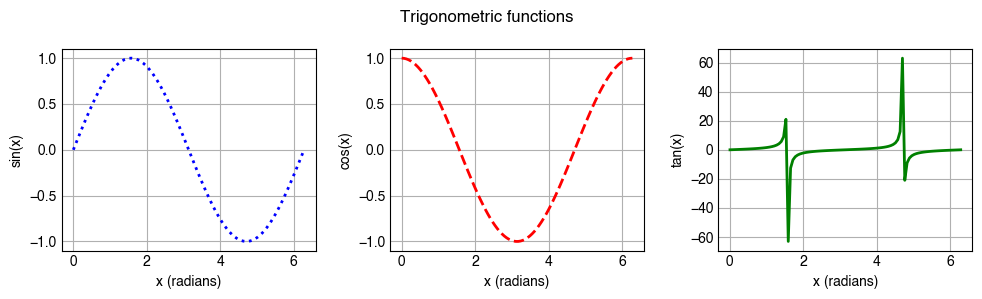

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use numpy to create data for three trigonometric functions
x = np.linspace(0, 2*np.pi, 100)
degrees = np.rad2deg(x)
sine = np.sin(x)
cosine = np.cos(x)
tangent = np.tan(x)

# Use matplotlib to plot the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.plot(x, sine, linewidth=2.0, color='b', linestyle=':')
ax1.set_ylabel('sin(x)')

ax2.plot(x, cosine, linewidth=2.0, color='r', linestyle='--')
ax2.set_ylabel('cos(x)')

ax3.plot(x, tangent, linewidth=2.0, color='g', linestyle='-')
ax3.set_ylabel('tan(x)')

for ax in (ax1, ax2, ax3):
    ax.set_xlabel('x (radians)')
    
fig.suptitle('Trigonometric functions')

plt.tight_layout()

# Create a pandas DataFrame to store the data and save
df = pd.DataFrame(
    {
        "sine": sine,
        "cosine": cosine,
        "tangent": tangent
    }
)

print(df)
df.to_csv('./trigonometric_functions.csv', index=None)